In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"fraudDetection_dataset.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,418688.27,C1756819670,1888091.55,2306779.82,C401424608,956455.03,1178808.14,0,0
1,2,CASH_IN,353902.72,C1583020257,3882328.25,4236230.97,C1401316767,583735.01,61151.23,0,0
2,5,PAYMENT,1574.63,C955581180,737.00,0.00,M108798399,0.00,0.00,0,0
3,2,PAYMENT,1994.71,C2101086700,5641.01,3646.30,M1910813448,0.00,0.00,0,0
4,1,CASH_OUT,681093.57,C1335061928,0.00,0.00,C1023714065,844302.40,1412484.09,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
7764,4,PAYMENT,1006.39,C675909854,7134.00,6127.61,M1448967471,0.00,0.00,0,0
7765,6,PAYMENT,22688.20,C752202140,426.00,0.00,M1896461827,0.00,0.00,0,0
7766,1,TRANSFER,383736.31,C340789130,11294.00,0.00,C1259769769,21835.74,252055.24,0,0
7767,5,PAYMENT,1021.03,C711320119,4272.12,3251.09,M977847192,0.00,0.00,0,0
7768,1,PAYMENT,2221.22,C771642661,60061.33,57840.12,M19467337,0.00,0.00,0,0


In [5]:
data.shape

(7769, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            7769 non-null   int64  
 1   type            7769 non-null   object 
 2   amount          7769 non-null   float64
 3   nameOrig        7769 non-null   object 
 4   oldbalanceOrg   7769 non-null   float64
 5   newbalanceOrig  7769 non-null   float64
 6   nameDest        7769 non-null   object 
 7   oldbalanceDest  7769 non-null   float64
 8   newbalanceDest  7769 non-null   float64
 9   isFraud         7769 non-null   int64  
 10  isFlaggedFraud  7769 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 667.8+ KB


In [7]:

data.isna().sum()  #check data is clean or not...

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

66 Of Frauds
7703 No Frauds


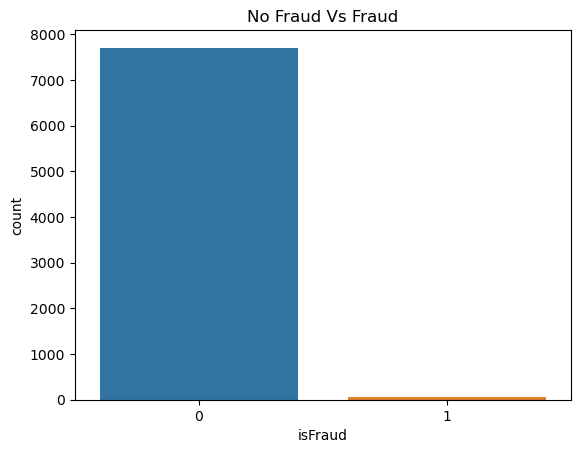

In [8]:
fraud=len(data[data["isFraud"]==1])
no_fraud=len(data[data["isFraud"]==0])
print(f"{fraud} Of Frauds")
print(f"{no_fraud} No Frauds")
sns.countplot(data=data,x="isFraud")
plt.title("No Fraud Vs Fraud")
plt.show()

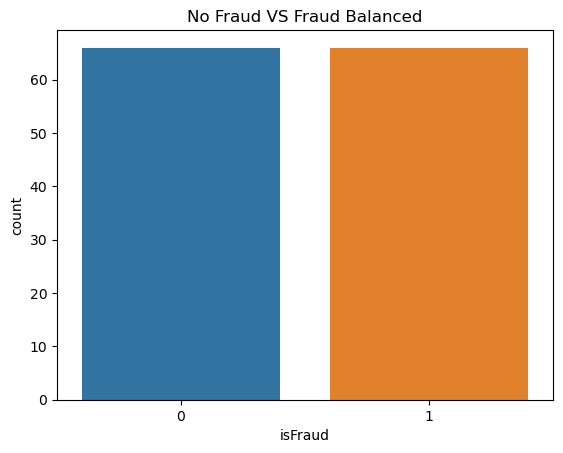

In [9]:
fraud_df=data.loc[data["isFraud"]==0][:66]
no_fraud_df=data.loc[data["isFraud"]==1]
new_norm_dist_df=pd.concat([fraud_df,no_fraud_df])
sns.countplot(data=new_norm_dist_df,x="isFraud")
plt.title("No Fraud VS Fraud Balanced")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10504\3255516537.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=new_norm_dist_df.corr()


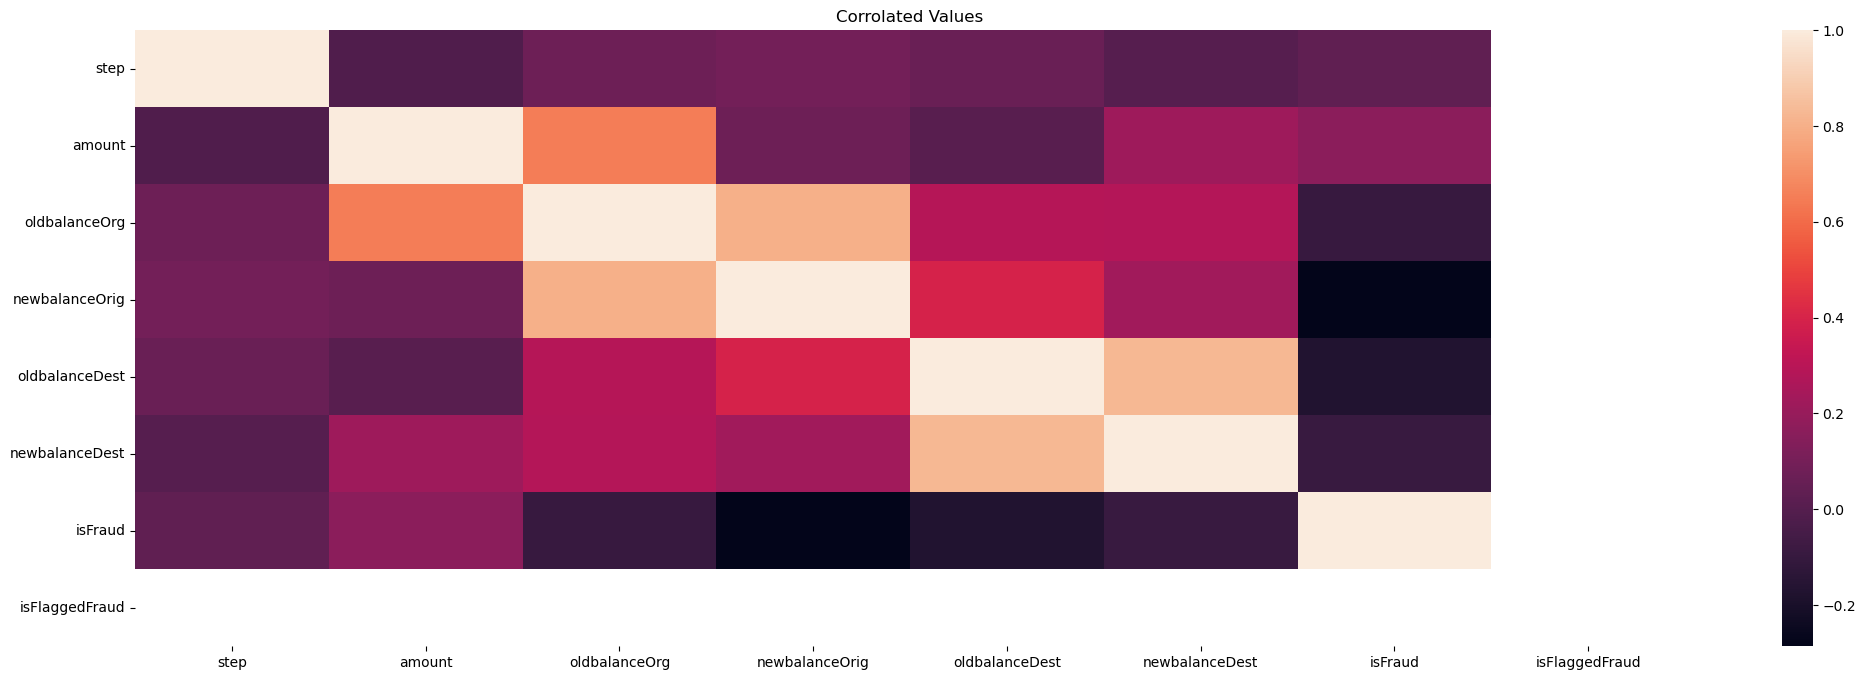

In [10]:
sns.color_palette(palette="husl",n_colors=10)
plt.figure(figsize=(25,8))
corr_data=new_norm_dist_df.corr()
sns.heatmap(data=corr_data)
plt.title("Corrolated Values")
plt.show()

In [11]:
data.isFraud.value_counts()

0    7703
1      66
Name: isFraud, dtype: int64

In [12]:
data["isFraud"] = data["isFraud"].map({0:"No Fraud", 1:"Fraud"})
print(data.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   CASH_IN  418688.27  C1756819670     1888091.55      2306779.82   
1     2   CASH_IN  353902.72  C1583020257     3882328.25      4236230.97   
2     5   PAYMENT    1574.63   C955581180         737.00            0.00   
3     2   PAYMENT    1994.71  C2101086700        5641.01         3646.30   
4     1  CASH_OUT  681093.57  C1335061928           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0   C401424608       956455.03      1178808.14  No Fraud               0  
1  C1401316767       583735.01        61151.23  No Fraud               0  
2   M108798399            0.00            0.00  No Fraud               0  
3  M1910813448            0.00            0.00  No Fraud               0  
4  C1023714065       844302.40      1412484.09  No Fraud               0  


In [13]:
data.isFlaggedFraud.value_counts()

0    7769
Name: isFlaggedFraud, dtype: int64

In [14]:
data = data.drop(['nameOrig','nameDest'], axis = 1)  #data preprocessing

In [15]:
#Import Label encoder
from sklearn import preprocessing 

#Label_encoder object knows how to understand word Labels.
label_encoder = preprocessing.LabelEncoder()

data['type'] = label_encoder.fit_transform(data['type'])

In [16]:
X, y = data.loc[:, data.columns != 'isFraud'], data['isFraud']
print(X)

      step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        1     0  418688.27     1888091.55      2306779.82       956455.03   
1        2     0  353902.72     3882328.25      4236230.97       583735.01   
2        5     3    1574.63         737.00            0.00            0.00   
3        2     3    1994.71        5641.01         3646.30            0.00   
4        1     1  681093.57           0.00            0.00       844302.40   
...    ...   ...        ...            ...             ...             ...   
7764     4     3    1006.39        7134.00         6127.61            0.00   
7765     6     3   22688.20         426.00            0.00            0.00   
7766     1     4  383736.31       11294.00            0.00        21835.74   
7767     5     3    1021.03        4272.12         3251.09            0.00   
7768     1     3    2221.22       60061.33        57840.12            0.00   

      newbalanceDest  isFlaggedFraud  
0         1178808.14    

In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=-1,strategy='mean')

In [19]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes impimp = SimpleImputer(missing_values=-1, strategy='mean')ort GaussianNB
from sklearn import metrics   #Import scikit-Learn metrics module for accuracy calculation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data.fillna(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#create a Gaussian Classifier
gnb = GaussianNB()

#X_cleaned=X.dropna()               #replace NaN values with the mean of each column
#Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9859594383775351


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state= 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9656786271450858


In [21]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Accuracy:", model.score(X_test,y_test))

Accuracy: 0.9961389961389961


In [22]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,418688.27,1888091.55,2306779.82,956455.03,1178808.14,0
1,2,0,353902.72,3882328.25,4236230.97,583735.01,61151.23,0
2,5,3,1574.63,737.00,0.00,0.00,0.00,0
3,2,3,1994.71,5641.01,3646.30,0.00,0.00,0
4,1,1,681093.57,0.00,0.00,844302.40,1412484.09,0
...,...,...,...,...,...,...,...,...
7764,4,3,1006.39,7134.00,6127.61,0.00,0.00,0
7765,6,3,22688.20,426.00,0.00,0.00,0.00,0
7766,1,4,383736.31,11294.00,0.00,21835.74,252055.24,0
7767,5,3,1021.03,4272.12,3251.09,0.00,0.00,0


In [23]:
features = np.array([[1,1,181,181 ,0.0,21182,0.0,0]])
print(model.predict(features))

['Fraud']


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
